#Orders and Outfit Tags Exploration
This notebook explores the orders of outfits from different categories and their corresponding tags.

*Note: The "Brand" category will not be explored due to the large number of tags.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/RecSys_206894495'

In [ ]:
!pip install pyarrow

import warnings
warnings.filterwarnings('ignore')

#Import libreirs
import pandas as pd
import numpy as np
import re

#Visulizetion
import seaborn as sns
import matplotlib.pyplot as plt

#Garbage collector
import gc

#Random
import random
#Set random seed
RSEED = 10
random.seed(RSEED)

In [ ]:
orders=pd.read_parquet(path+'/archive/data/orders.parquet',engine='pyarrow')
orders.head()

,customer.id,outfit.id,rentalPeriod.start,rentalPeriod.end
0,3945,outfit.923f3fd476b5450b9582d1f525604546,2018-05-25,2018-05-28
1,4088,outfit.8c8e922e228ba03f,2019-08-29,2019-09-02
2,4360,outfit.96f152543e7668ae,2018-08-10,2018-08-13
3,4697,outfit.ddba05a5ced34fa1ab3a0722c05bb11a,2018-06-14,2018-06-19
4,3890,outfit.5ef01d4dc15243fb854ca797716fd663,2019-08-24,2019-08-27


In [ ]:
outfit_tags=pd.read_parquet(path+'/archive/data/outfit_tags.parquet',engine='pyarrow')
outfit_tags.head()

,id,tag,category
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Synthetic,Material
1,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Statement,Occasion
2,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Dresses,Category
3,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Metallic,Details
4,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Mini,Length


In [ ]:
outfits=pd.read_parquet(path+'/archive/data/outfits.parquet',engine='pyarrow')
outfits.head()

,id,name,description,group,owner,timeCreated,retailPrice,pricePerWeek,pricePerMonth,outfit_tags,tag_categories
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'..."
1,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Yellow Shell Mellomholmene Blouse,This beautiful blouse features an adjustable n...,group.61ad2fcabb3e9197e3836376e6b67f2c,o_00577,2021-06-07 12:07:22.921,1300.0,590.0,1180.0,"['ILAG', 'Tops', 'Spring', 'Summer', 'M', 'Pat...","['Brand', 'Category', 'Seasons', 'Seasons', 'S..."
2,outfit.fff175b13ceb453f9928625491412ede,Kaula Dress Black,Kaula from Rodebjer is a fitted dress made in ...,group.37c2b59d63d3a9c2d58e07f532f71f7f,o_00336,2023-06-05 09:17:59.004,3100.0,930.0,1860.0,"['Black', 'Mini', 'M', 'Everyday', 'Multi Seas...","['Color', 'Length', 'Size', 'Occasion', 'Seaso..."
3,outfit.ffef9d7c292a48b69076d2df2e32352f,For sale - Jarvis Blouse,This wrap blouse has mid length sleeves and a ...,group.dfcaa57546b0b7a5e9eb204449b6cc1c,o_00030,2021-05-18 14:02:28.690,1500.0,590.0,1180.0,"['XS', 'Multi Season', 'Stylein', 'Tops', 'Cot...","['Size', 'Seasons', 'Brand', 'Category', 'Mate..."
4,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Black Amber Pants,"Feel slack and nice dressed with this pant, ma...",group.ee297c977905eb21a123a4aea5fbb6d2,o_00602,2021-07-16 14:02:30.643,1200.0,590.0,1180.0,"['Cotton', 'Black', 'Everyday', 'Knitwear', 'L...","['Material', 'Color', 'Occasion', 'Category', ..."


In [ ]:
# Calculate the rental period duration in days
orders['rentalPeriod'] = (orders['rentalPeriod.end'] - orders['rentalPeriod.start']).dt.days

In [ ]:
# Merge with outfits on the id column
merged_df = pd.merge(orders, outfit_tags, left_on='outfit.id',right_on='id')

In [ ]:
merged_df.drop(columns=['id'],inplace=True)
merged_df.columns

Index(['customer.id', 'outfit.id', 'rentalPeriod.start', 'rentalPeriod.end',
       'rentalPeriod', 'tag', 'category'],
      dtype='object')

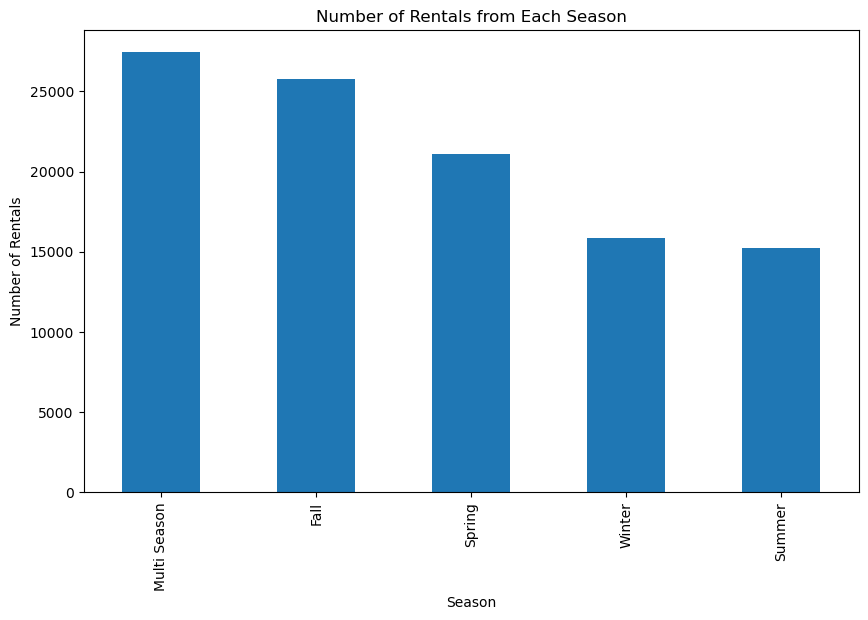

In [ ]:
# Filter the dataframe where category is 'Seasons'
filtered_df = merged_df[merged_df['category'] == 'Seasons']

# Plot the number of Rentals from each season
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Season')
plt.show()


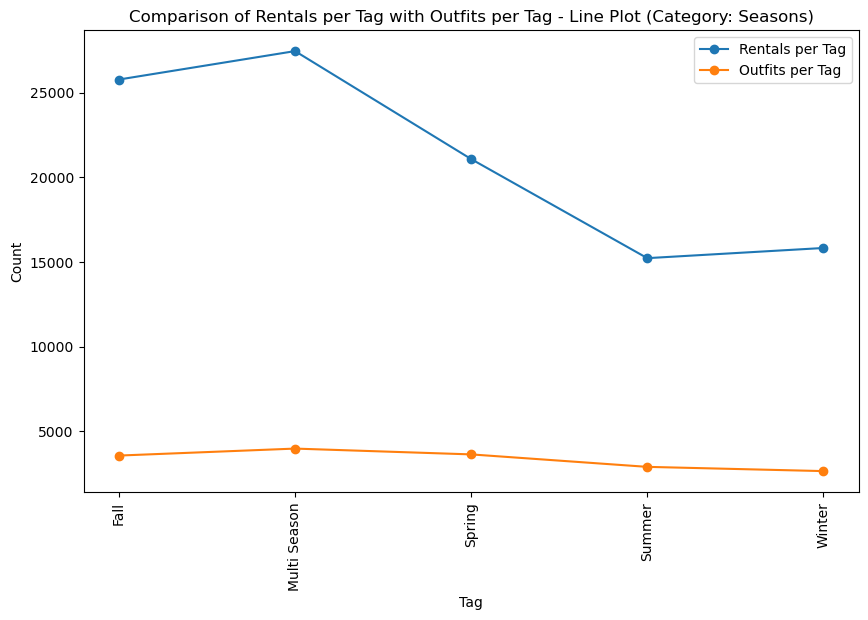

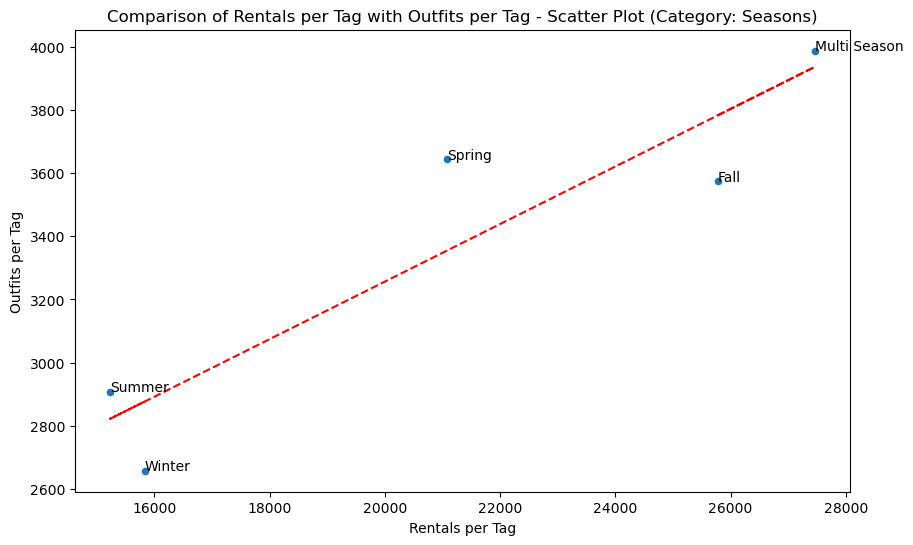

In [ ]:
# Count the number of rentals per tag
rentals_per_tag = filtered_df['tag'].value_counts()

# Count the number of outfits per tag
outfits_per_tag = filtered_df.groupby('tag')['outfit.id'].nunique()

# Compare the number of rentals per tag with the number of outfits from this tag
comparison = pd.DataFrame({
    'rentals_per_tag': rentals_per_tag,
    'outfits_per_tag': outfits_per_tag
})

# Line plot
comparison.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Line Plot (Category: Seasons)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(ticks=range(len(comparison.index)), labels=comparison.index, rotation=90)
plt.legend(['Rentals per Tag', 'Outfits per Tag'])
plt.show()

# Scatter plot
comparison.plot(kind='scatter', x='rentals_per_tag', y='outfits_per_tag', figsize=(10, 6))
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Scatter Plot (Category: Seasons)')
plt.xlabel('Rentals per Tag')
plt.ylabel('Outfits per Tag')

# Add annotations
for i, txt in enumerate(comparison.index):
    plt.annotate(txt, (comparison['rentals_per_tag'][i], comparison['outfits_per_tag'][i]))

# Calculate trend line
z = np.polyfit(comparison['rentals_per_tag'], comparison['outfits_per_tag'], 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(comparison['rentals_per_tag'], p(comparison['rentals_per_tag']), "r--")

plt.show()



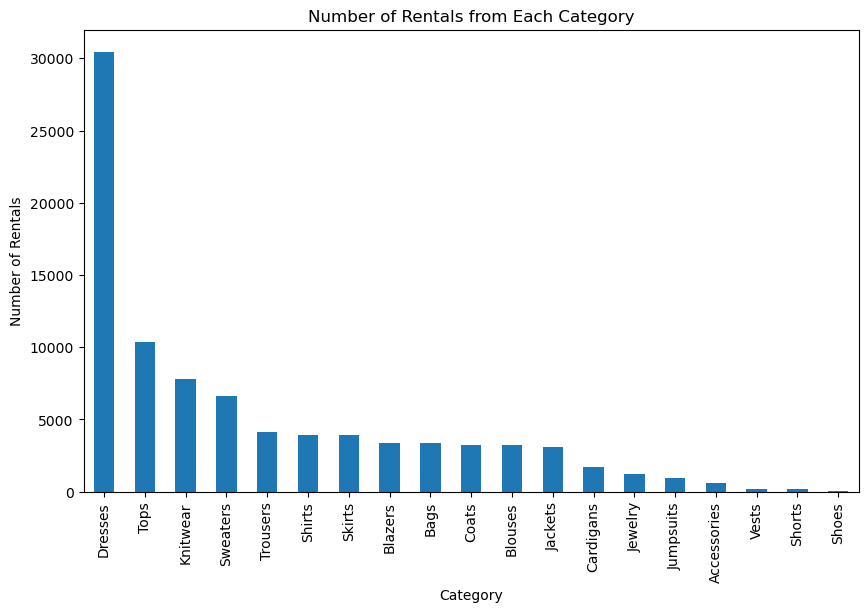

In [ ]:
# Filter the dataframe where category is 'Category'
filtered_df = merged_df[merged_df['category'] == 'Category']

# Plot the number of Rentals from each season
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Category')
plt.show()


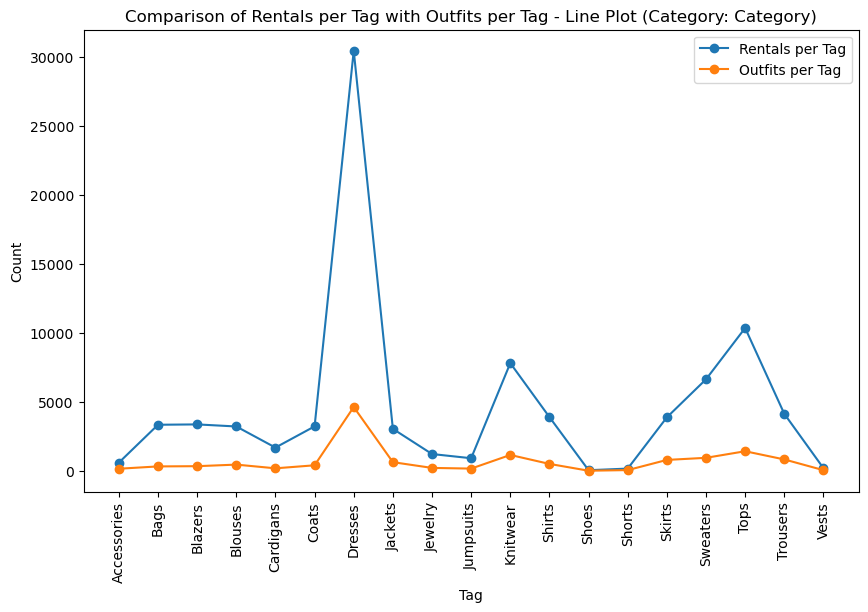

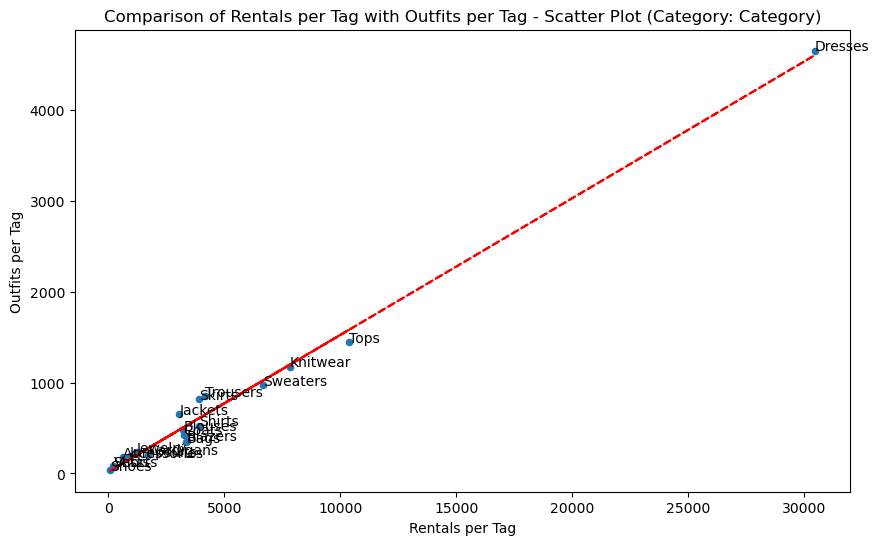

In [ ]:
# Count the number of rentals per tag
rentals_per_tag = filtered_df['tag'].value_counts()

# Count the number of outfits per tag
outfits_per_tag = filtered_df.groupby('tag')['outfit.id'].nunique()

# Compare the number of rentals per tag with the number of outfits from this tag
comparison = pd.DataFrame({
    'rentals_per_tag': rentals_per_tag,
    'outfits_per_tag': outfits_per_tag
})

# Line plot
comparison.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Line Plot (Category: Category)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(ticks=range(len(comparison.index)), labels=comparison.index, rotation=90)
plt.legend(['Rentals per Tag', 'Outfits per Tag'])
plt.show()

# Scatter plot
comparison.plot(kind='scatter', x='rentals_per_tag', y='outfits_per_tag', figsize=(10, 6))
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Scatter Plot (Category: Category)')
plt.xlabel('Rentals per Tag')
plt.ylabel('Outfits per Tag')

# Add annotations
for i, txt in enumerate(comparison.index):
    plt.annotate(txt, (comparison['rentals_per_tag'][i], comparison['outfits_per_tag'][i]))

# Calculate trend line
z = np.polyfit(comparison['rentals_per_tag'], comparison['outfits_per_tag'], 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(comparison['rentals_per_tag'], p(comparison['rentals_per_tag']), "r--")

plt.show()



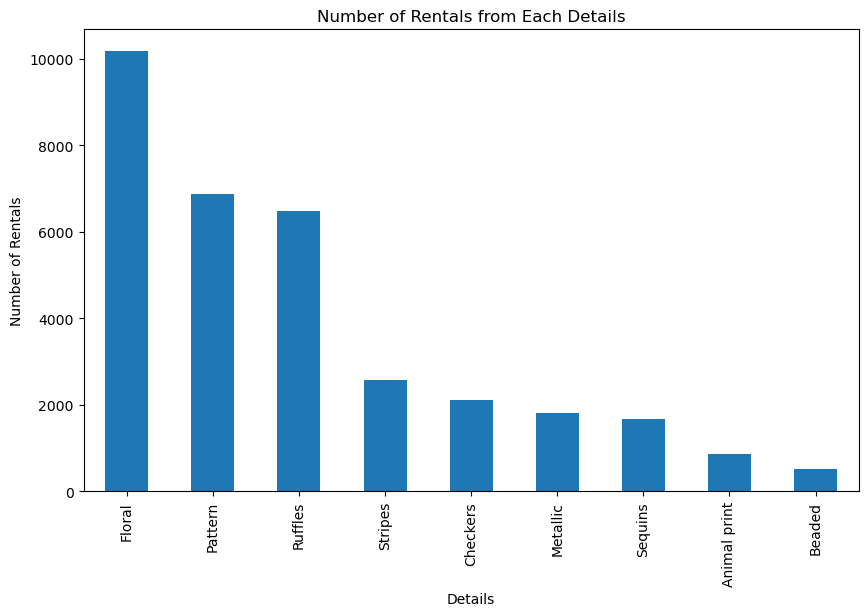

In [ ]:
# Filter the dataframe where category is 'Details'
filtered_df = merged_df[merged_df['category'] == 'Details']

# Plot the number of Rentals from each season
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Details')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Details')
plt.show()


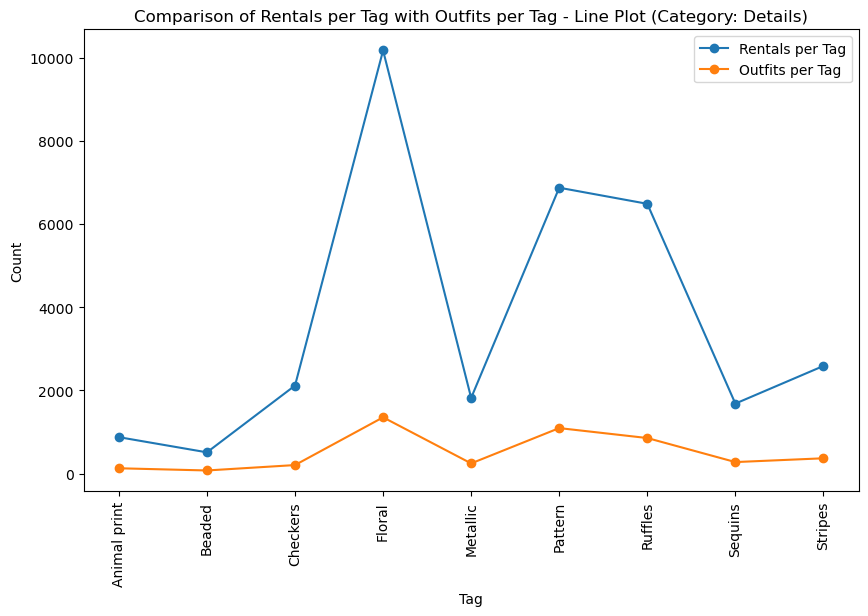

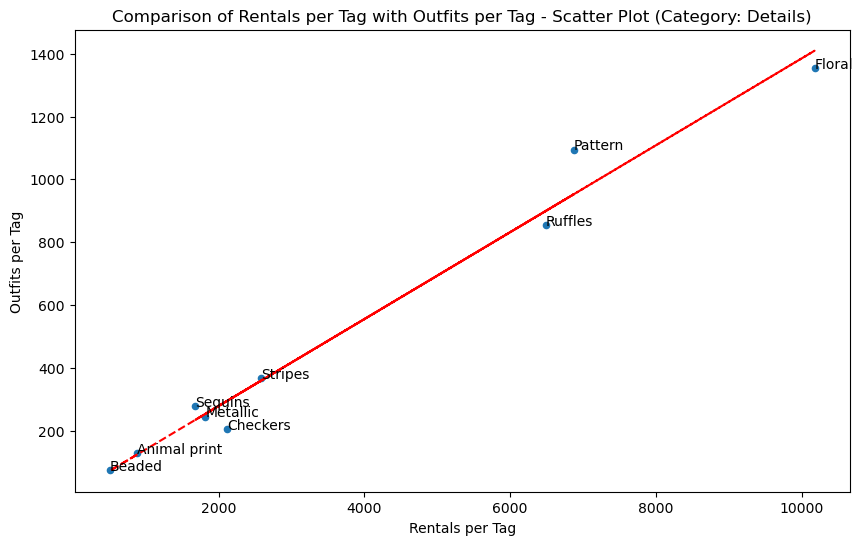

In [ ]:
# Count the number of rentals per tag
rentals_per_tag = filtered_df['tag'].value_counts()

# Count the number of outfits per tag
outfits_per_tag = filtered_df.groupby('tag')['outfit.id'].nunique()

# Compare the number of rentals per tag with the number of outfits from this tag
comparison = pd.DataFrame({
    'rentals_per_tag': rentals_per_tag,
    'outfits_per_tag': outfits_per_tag
})

# Line plot
comparison.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Line Plot (Category: Details)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(ticks=range(len(comparison.index)), labels=comparison.index, rotation=90)
plt.legend(['Rentals per Tag', 'Outfits per Tag'])
plt.show()

# Scatter plot
comparison.plot(kind='scatter', x='rentals_per_tag', y='outfits_per_tag', figsize=(10, 6))
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Scatter Plot (Category: Details)')
plt.xlabel('Rentals per Tag')
plt.ylabel('Outfits per Tag')

# Add annotations
for i, txt in enumerate(comparison.index):
    plt.annotate(txt, (comparison['rentals_per_tag'][i], comparison['outfits_per_tag'][i]))

# Calculate trend line
z = np.polyfit(comparison['rentals_per_tag'], comparison['outfits_per_tag'], 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(comparison['rentals_per_tag'], p(comparison['rentals_per_tag']), "r--")

plt.show()



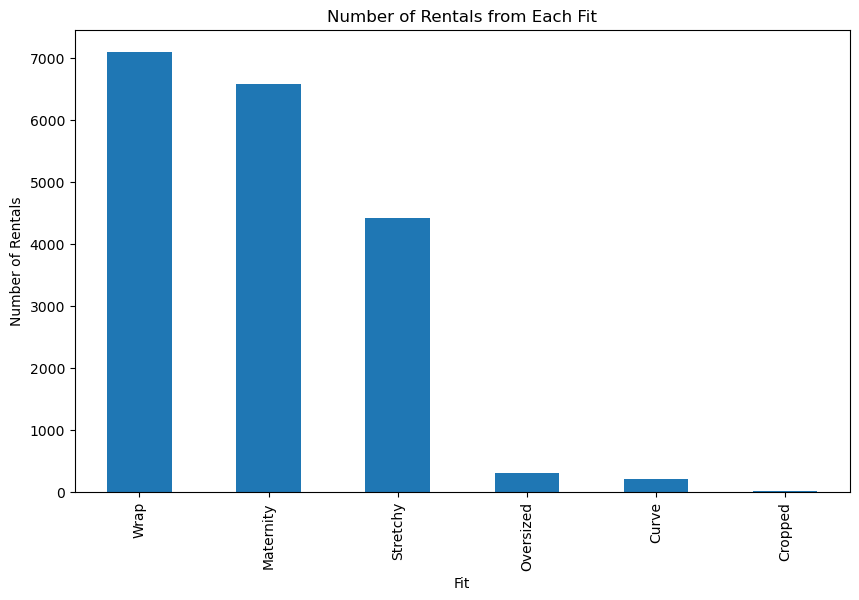

In [ ]:
# Filter the dataframe where category is 'Fit'
filtered_df = merged_df[merged_df['category'] == 'Fit']

# Plot the number of Rentals from each season
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Fit')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Fit')
plt.show()


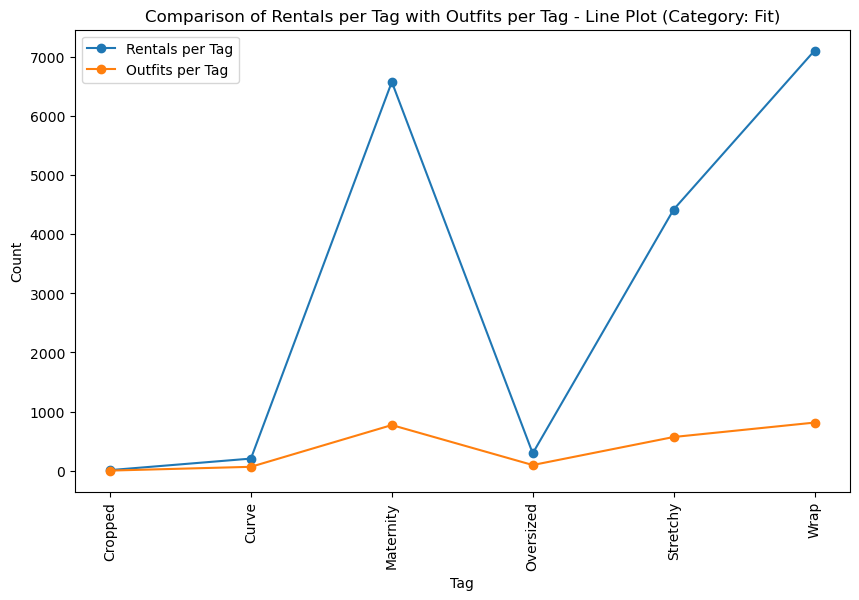

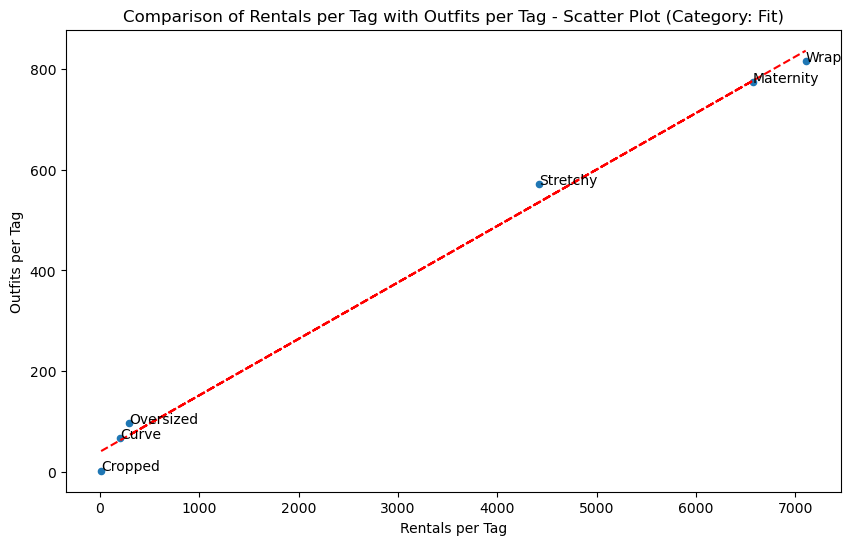

In [ ]:
# Count the number of rentals per tag
rentals_per_tag = filtered_df['tag'].value_counts()

# Count the number of outfits per tag
outfits_per_tag = filtered_df.groupby('tag')['outfit.id'].nunique()

# Compare the number of rentals per tag with the number of outfits from this tag
comparison = pd.DataFrame({
    'rentals_per_tag': rentals_per_tag,
    'outfits_per_tag': outfits_per_tag
})

# Line plot
comparison.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Line Plot (Category: Fit)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(ticks=range(len(comparison.index)), labels=comparison.index, rotation=90)
plt.legend(['Rentals per Tag', 'Outfits per Tag'])
plt.show()

# Scatter plot
comparison.plot(kind='scatter', x='rentals_per_tag', y='outfits_per_tag', figsize=(10, 6))
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Scatter Plot (Category: Fit)')
plt.xlabel('Rentals per Tag')
plt.ylabel('Outfits per Tag')

# Add annotations
for i, txt in enumerate(comparison.index):
    plt.annotate(txt, (comparison['rentals_per_tag'][i], comparison['outfits_per_tag'][i]))

# Calculate trend line
z = np.polyfit(comparison['rentals_per_tag'], comparison['outfits_per_tag'], 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(comparison['rentals_per_tag'], p(comparison['rentals_per_tag']), "r--")

plt.show()



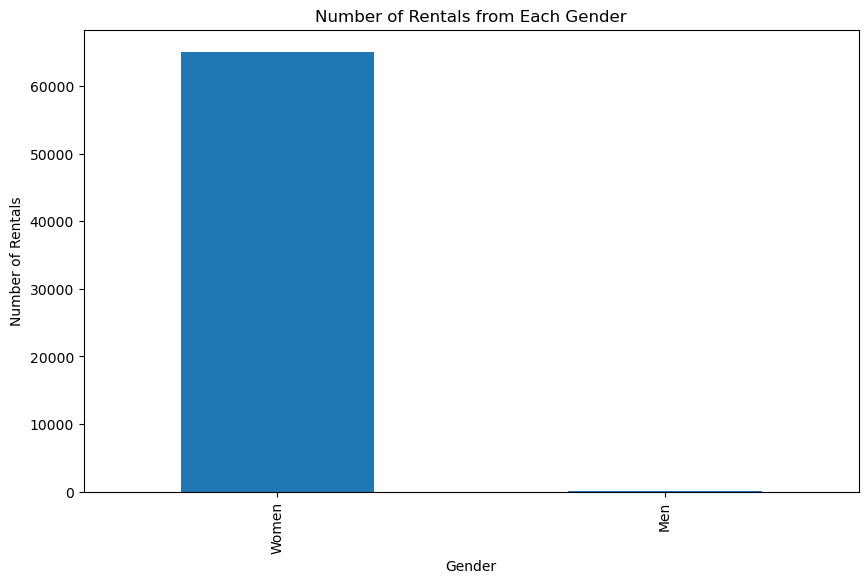

In [ ]:
# Filter the dataframe where category is 'Seasons'
filtered_df = merged_df[merged_df['category'] == 'Gender']

# Plot the number of Rentals from each season
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Gender')
plt.show()


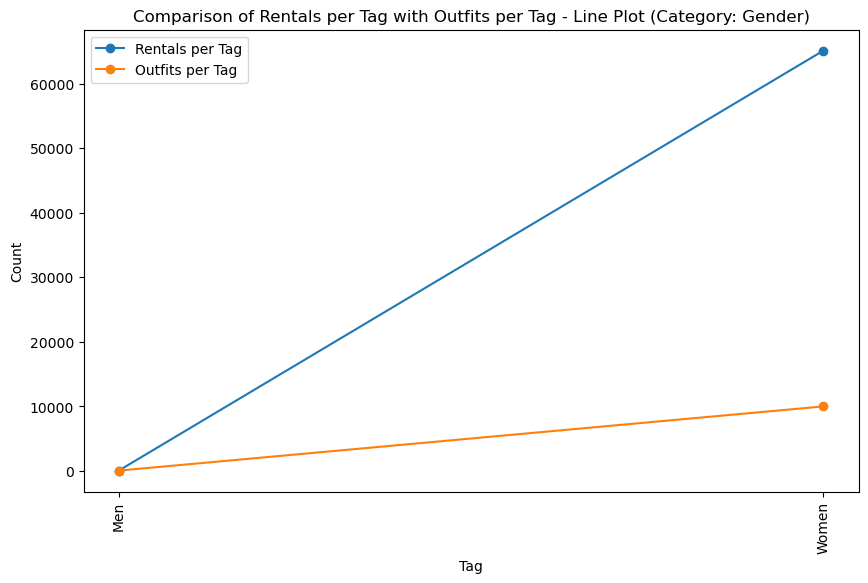

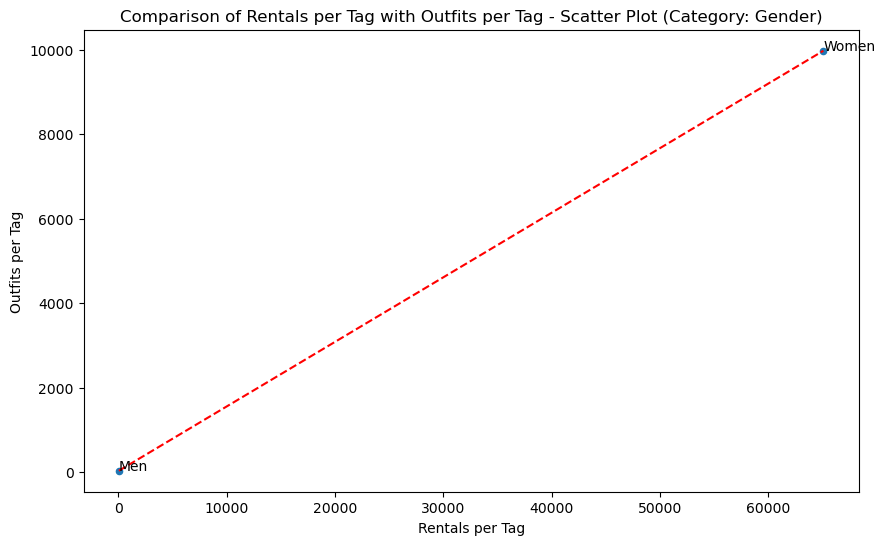

In [ ]:
# Count the number of rentals per tag
rentals_per_tag = filtered_df['tag'].value_counts()

# Count the number of outfits per tag
outfits_per_tag = filtered_df.groupby('tag')['outfit.id'].nunique()

# Compare the number of rentals per tag with the number of outfits from this tag
comparison = pd.DataFrame({
    'rentals_per_tag': rentals_per_tag,
    'outfits_per_tag': outfits_per_tag
})

# Line plot
comparison.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Line Plot (Category: Gender)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(ticks=range(len(comparison.index)), labels=comparison.index, rotation=90)
plt.legend(['Rentals per Tag', 'Outfits per Tag'])
plt.show()

# Scatter plot
comparison.plot(kind='scatter', x='rentals_per_tag', y='outfits_per_tag', figsize=(10, 6))
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Scatter Plot (Category: Gender)')
plt.xlabel('Rentals per Tag')
plt.ylabel('Outfits per Tag')

# Add annotations
for i, txt in enumerate(comparison.index):
    plt.annotate(txt, (comparison['rentals_per_tag'][i], comparison['outfits_per_tag'][i]))

# Calculate trend line
z = np.polyfit(comparison['rentals_per_tag'], comparison['outfits_per_tag'], 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(comparison['rentals_per_tag'], p(comparison['rentals_per_tag']), "r--")

plt.show()



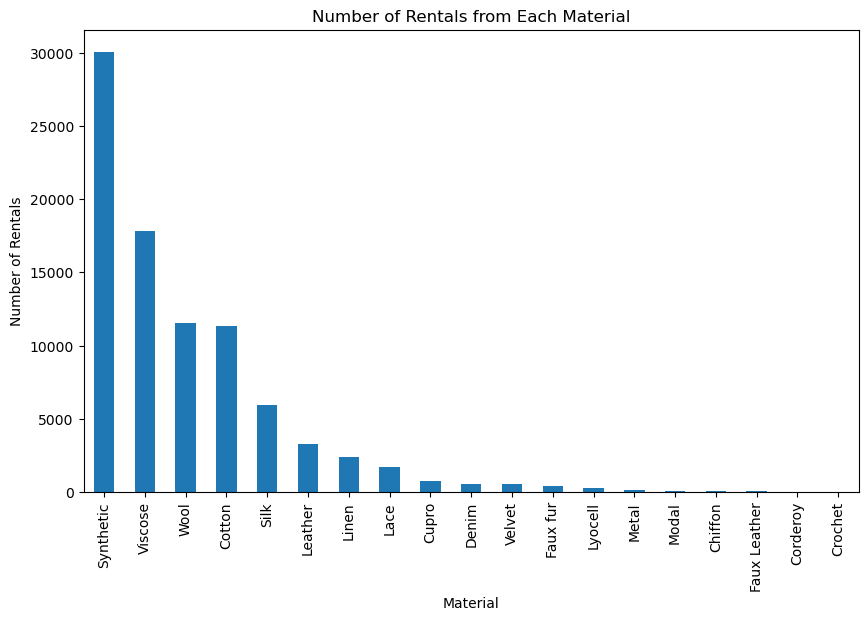

In [ ]:
# Filter the dataframe where category is 'Material'
filtered_df = merged_df[merged_df['category'] == 'Material']

# Plot the number of Rentals from each Material
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Material')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Material')
plt.show()


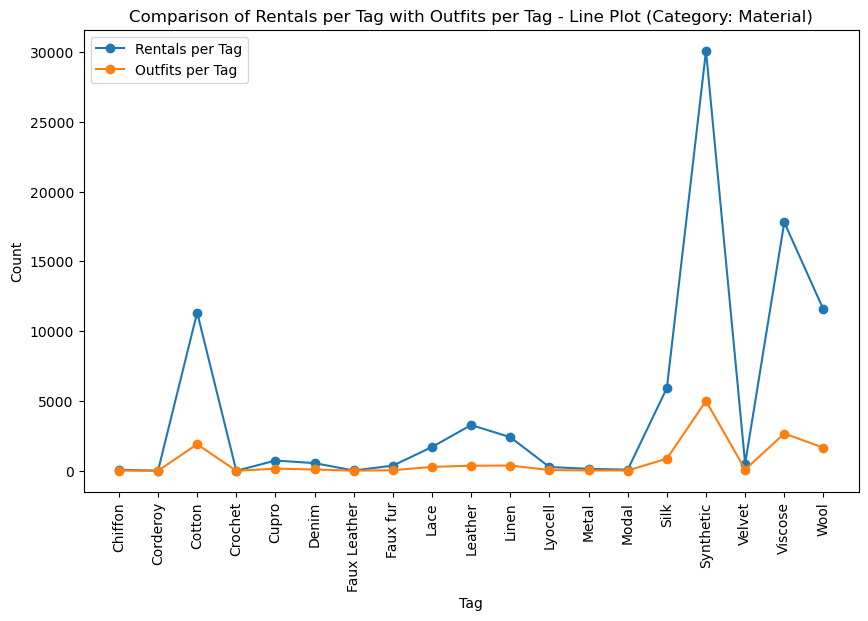

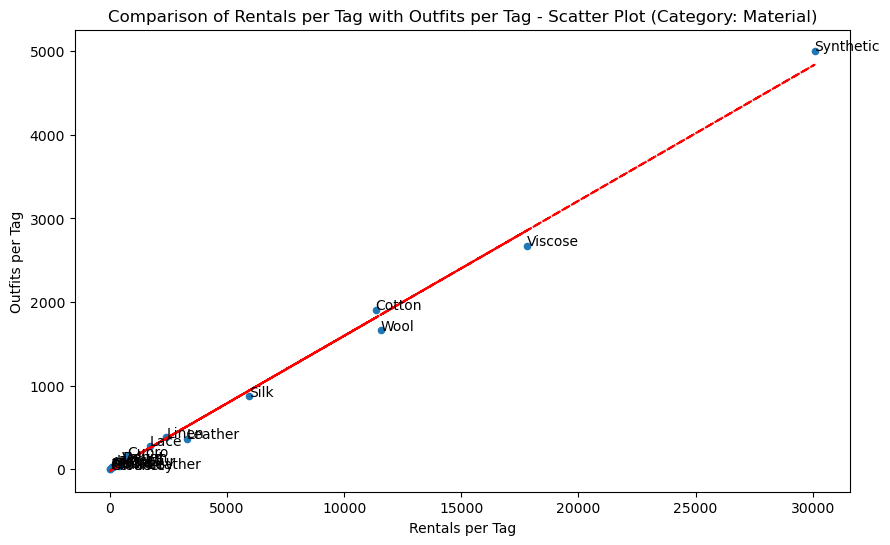

In [ ]:
# Count the number of rentals per tag
rentals_per_tag = filtered_df['tag'].value_counts()

# Count the number of outfits per tag
outfits_per_tag = filtered_df.groupby('tag')['outfit.id'].nunique()

# Compare the number of rentals per tag with the number of outfits from this tag
comparison = pd.DataFrame({
    'rentals_per_tag': rentals_per_tag,
    'outfits_per_tag': outfits_per_tag
})

# Line plot
comparison.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Line Plot (Category: Material)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(ticks=range(len(comparison.index)), labels=comparison.index, rotation=90)
plt.legend(['Rentals per Tag', 'Outfits per Tag'])
plt.show()

# Scatter plot
comparison.plot(kind='scatter', x='rentals_per_tag', y='outfits_per_tag', figsize=(10, 6))
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Scatter Plot (Category: Material)')
plt.xlabel('Rentals per Tag')
plt.ylabel('Outfits per Tag')

# Add annotations
for i, txt in enumerate(comparison.index):
    plt.annotate(txt, (comparison['rentals_per_tag'][i], comparison['outfits_per_tag'][i]))

# Calculate trend line
z = np.polyfit(comparison['rentals_per_tag'], comparison['outfits_per_tag'], 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(comparison['rentals_per_tag'], p(comparison['rentals_per_tag']), "r--")

plt.show()



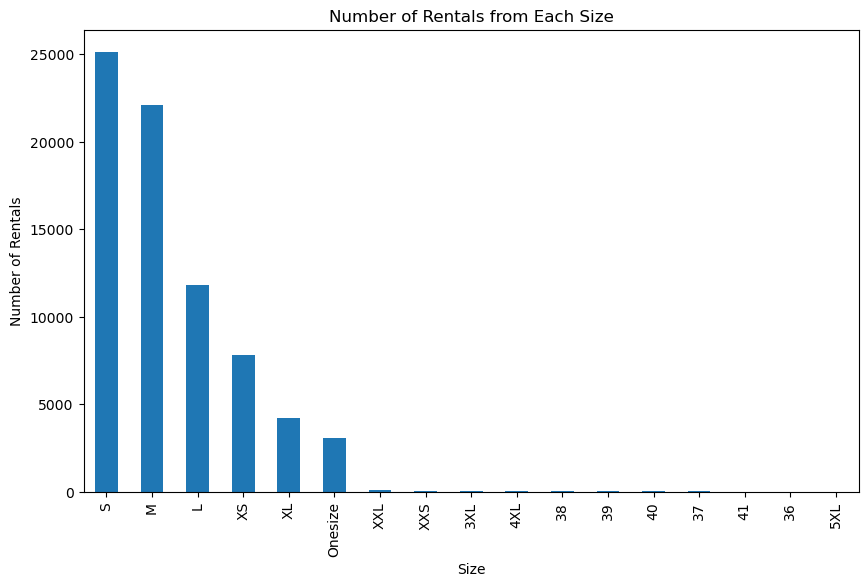

In [ ]:
# Filter the dataframe where category is 'Size'
filtered_df = merged_df[merged_df['category'] == 'Size']

# Plot the number of Rentals from each Size
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Size')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Size')
plt.show()


In [ ]:
#Quick conversion to get an idea of the sizes
size_mapping = {
    '32': 'XXS',
    '34': 'XS',
    '36': 'S',
    '37':'M',
    '38': 'M',
    '39': 'L',
    '40': 'L',
    '41': 'L',
    '42': 'XL',
    '44': 'XXL'
}
filtered_df = filtered_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Convert the sizes in the dataframe
filtered_df['tag'] = filtered_df['tag'].apply(lambda x: size_mapping.get(x, x))

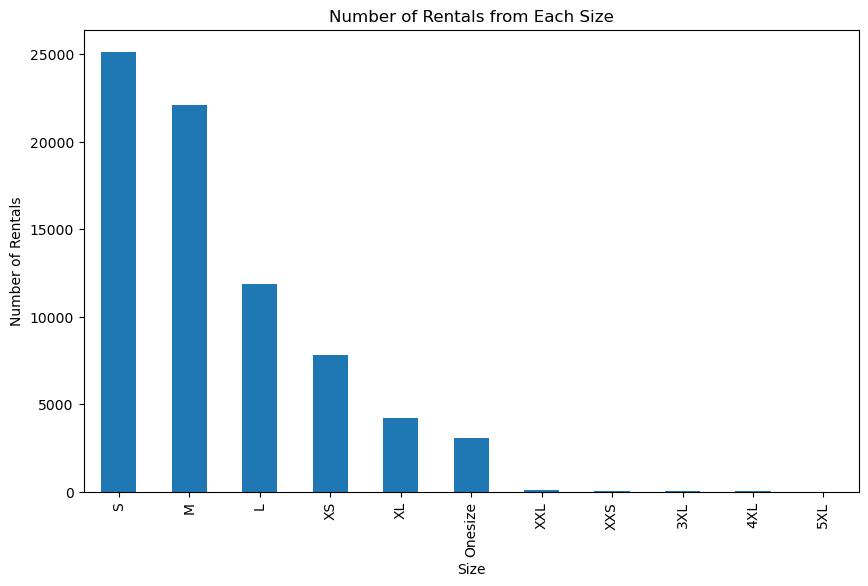

In [ ]:
# Plot the number of Rentals from each Size
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Size')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Size')
plt.show()


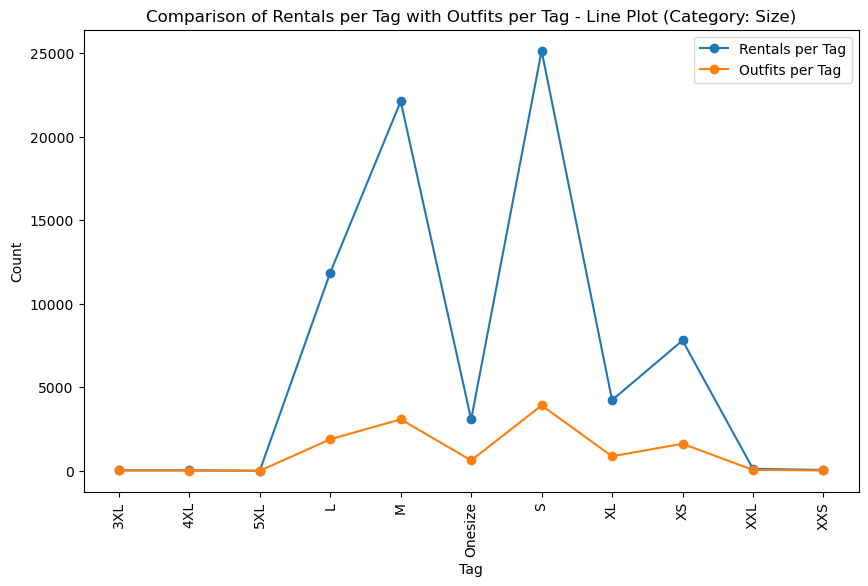

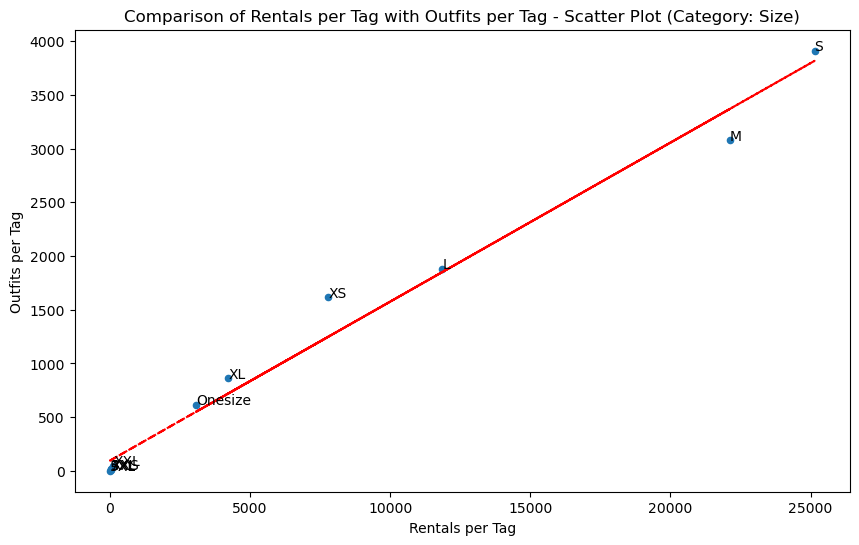

In [ ]:
# Count the number of rentals per tag
rentals_per_tag = filtered_df['tag'].value_counts()

# Count the number of outfits per tag
outfits_per_tag = filtered_df.groupby('tag')['outfit.id'].nunique()

# Compare the number of rentals per tag with the number of outfits from this tag
comparison = pd.DataFrame({
    'rentals_per_tag': rentals_per_tag,
    'outfits_per_tag': outfits_per_tag
})

# Line plot
comparison.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Line Plot (Category: Size)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(ticks=range(len(comparison.index)), labels=comparison.index, rotation=90)
plt.legend(['Rentals per Tag', 'Outfits per Tag'])
plt.show()

# Scatter plot
comparison.plot(kind='scatter', x='rentals_per_tag', y='outfits_per_tag', figsize=(10, 6))
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Scatter Plot (Category: Size)')
plt.xlabel('Rentals per Tag')
plt.ylabel('Outfits per Tag')

# Add annotations
for i, txt in enumerate(comparison.index):
    plt.annotate(txt, (comparison['rentals_per_tag'][i], comparison['outfits_per_tag'][i]))

# Calculate trend line
z = np.polyfit(comparison['rentals_per_tag'], comparison['outfits_per_tag'], 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(comparison['rentals_per_tag'], p(comparison['rentals_per_tag']), "r--")

plt.show()



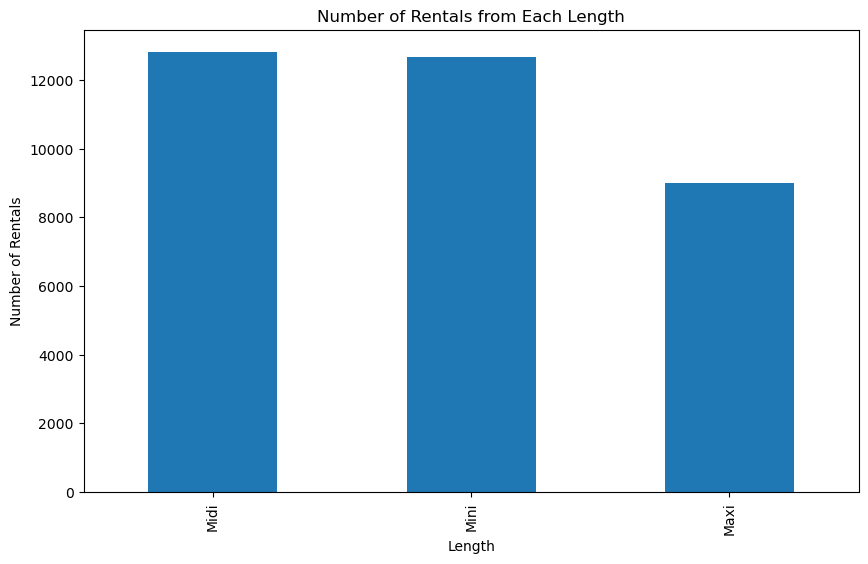

In [ ]:
# Filter the dataframe where category is 'Length'
filtered_df = merged_df[merged_df['category'] == 'Length']

# Plot the number of Rentals from each Length
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Length')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Length')
plt.show()


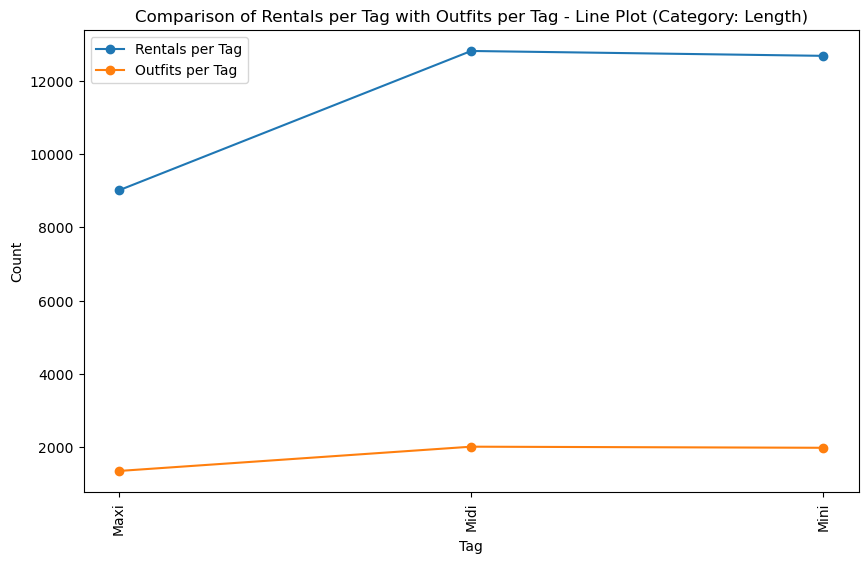

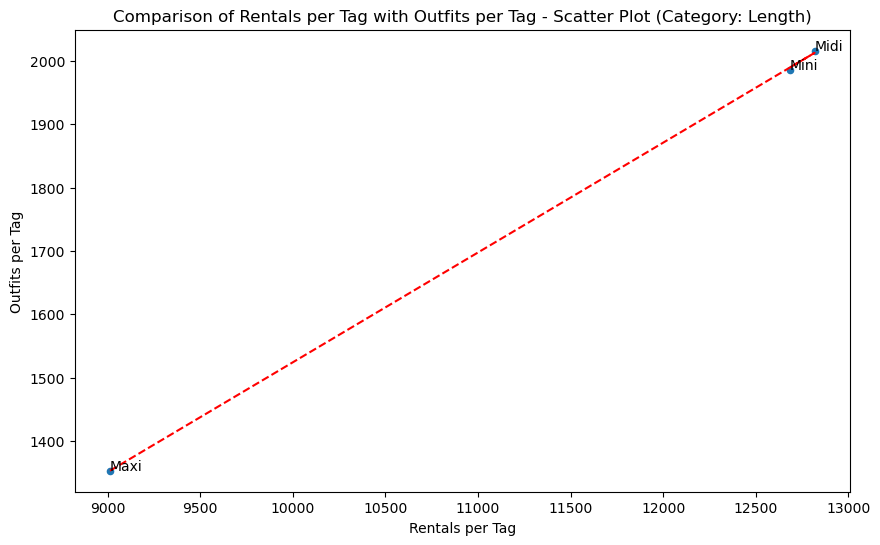

In [ ]:
# Count the number of rentals per tag
rentals_per_tag = filtered_df['tag'].value_counts()

# Count the number of outfits per tag
outfits_per_tag = filtered_df.groupby('tag')['outfit.id'].nunique()

# Compare the number of rentals per tag with the number of outfits from this tag
comparison = pd.DataFrame({
    'rentals_per_tag': rentals_per_tag,
    'outfits_per_tag': outfits_per_tag
})

# Line plot
comparison.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Line Plot (Category: Length)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(ticks=range(len(comparison.index)), labels=comparison.index, rotation=90)
plt.legend(['Rentals per Tag', 'Outfits per Tag'])
plt.show()

# Scatter plot
comparison.plot(kind='scatter', x='rentals_per_tag', y='outfits_per_tag', figsize=(10, 6))
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Scatter Plot (Category: Length)')
plt.xlabel('Rentals per Tag')
plt.ylabel('Outfits per Tag')

# Add annotations
for i, txt in enumerate(comparison.index):
    plt.annotate(txt, (comparison['rentals_per_tag'][i], comparison['outfits_per_tag'][i]))

# Calculate trend line
z = np.polyfit(comparison['rentals_per_tag'], comparison['outfits_per_tag'], 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(comparison['rentals_per_tag'], p(comparison['rentals_per_tag']), "r--")

plt.show()



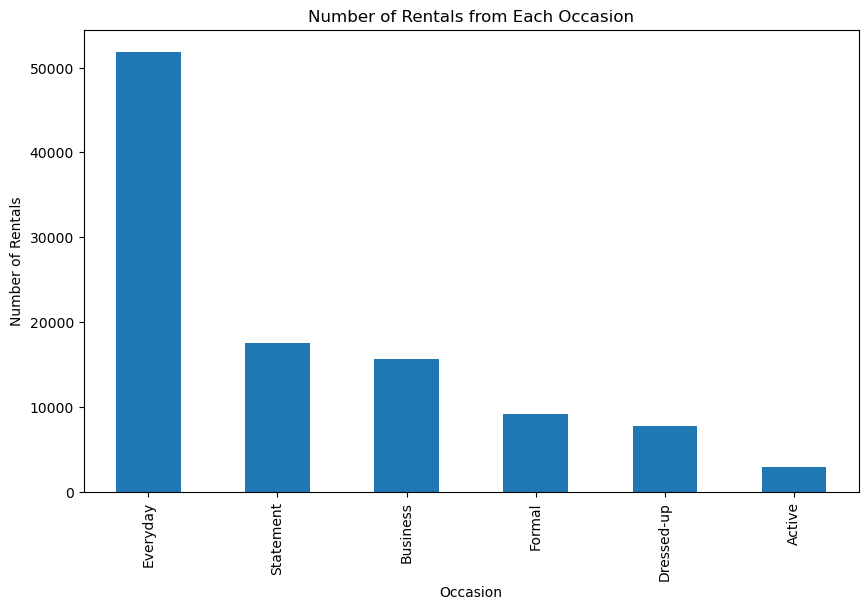

In [ ]:
# Filter the dataframe where category is 'Occasion'
filtered_df = merged_df[merged_df['category'] == 'Occasion']

# Plot the number of Rentals from each Occasion
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Occasion')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Occasion')
plt.show()


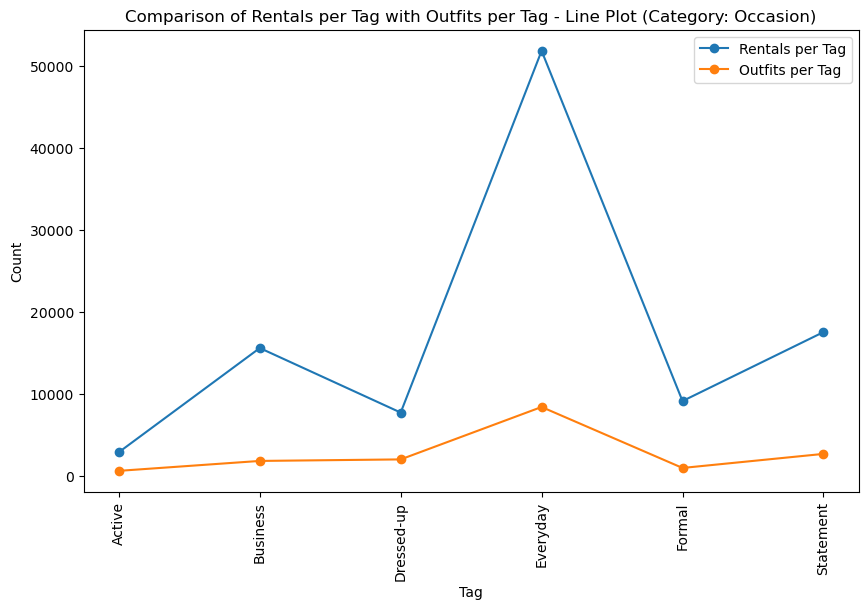

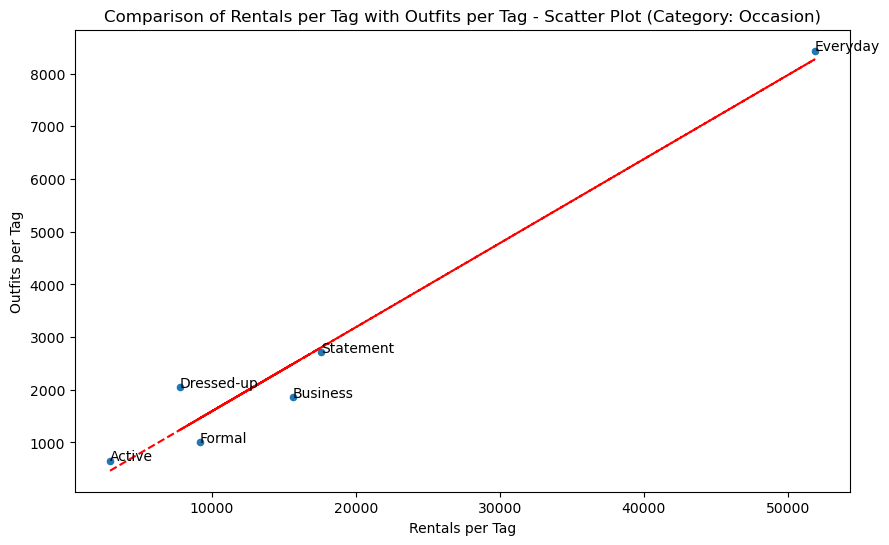

In [ ]:
# Count the number of rentals per tag
rentals_per_tag = filtered_df['tag'].value_counts()

# Count the number of outfits per tag
outfits_per_tag = filtered_df.groupby('tag')['outfit.id'].nunique()

# Compare the number of rentals per tag with the number of outfits from this tag
comparison = pd.DataFrame({
    'rentals_per_tag': rentals_per_tag,
    'outfits_per_tag': outfits_per_tag
})

# Line plot
comparison.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Line Plot (Category: Occasion)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(ticks=range(len(comparison.index)), labels=comparison.index, rotation=90)
plt.legend(['Rentals per Tag', 'Outfits per Tag'])
plt.show()

# Scatter plot
comparison.plot(kind='scatter', x='rentals_per_tag', y='outfits_per_tag', figsize=(10, 6))
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Scatter Plot (Category: Occasion)')
plt.xlabel('Rentals per Tag')
plt.ylabel('Outfits per Tag')

# Add annotations
for i, txt in enumerate(comparison.index):
    plt.annotate(txt, (comparison['rentals_per_tag'][i], comparison['outfits_per_tag'][i]))

# Calculate trend line
z = np.polyfit(comparison['rentals_per_tag'], comparison['outfits_per_tag'], 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(comparison['rentals_per_tag'], p(comparison['rentals_per_tag']), "r--")

plt.show()



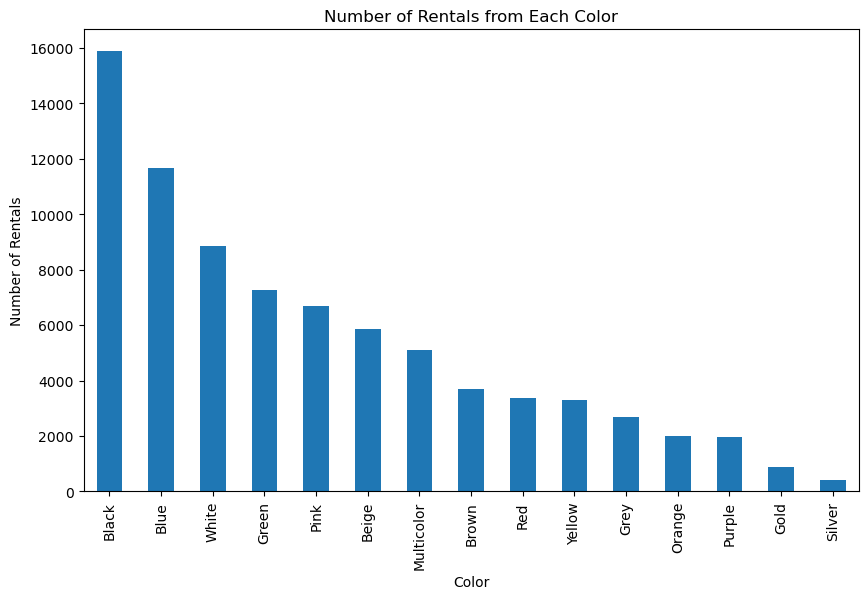

In [ ]:
# Filter the dataframe where category is 'Color'
filtered_df = merged_df[merged_df['category'] == 'Color']

# Plot the number of Rentals from each Color
plt.figure(figsize=(10, 6))
season_counts = filtered_df['tag'].value_counts()
season_counts.plot(kind='bar')

plt.xlabel('Color')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals from Each Color')
plt.show()


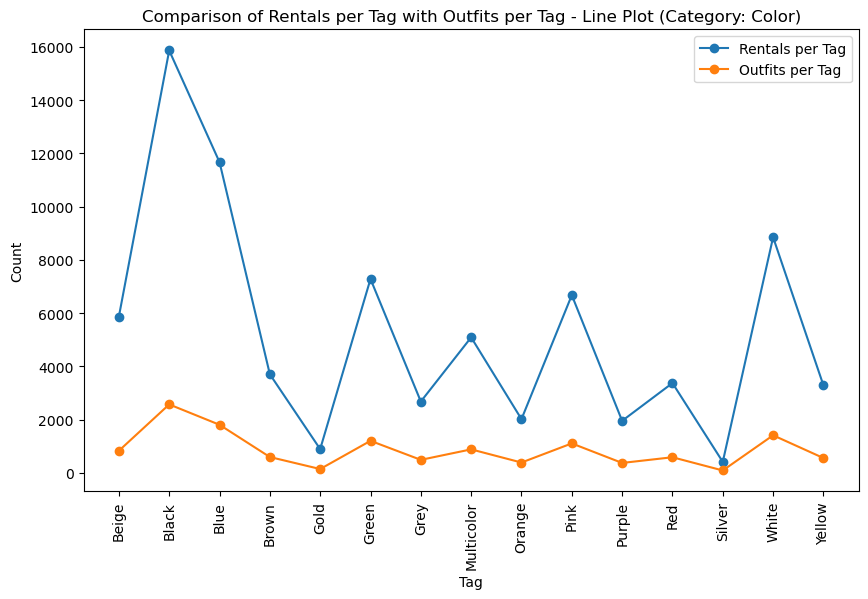

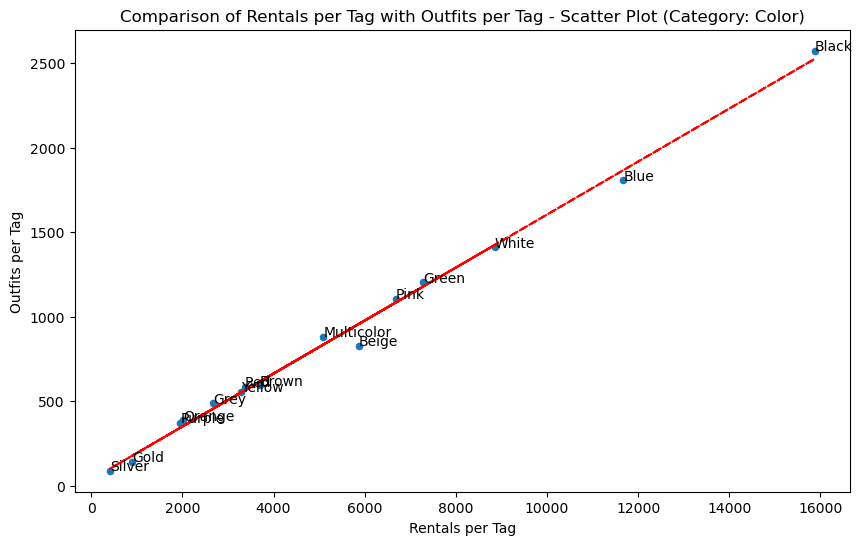

In [ ]:
# Count the number of rentals per tag
rentals_per_tag = filtered_df['tag'].value_counts()

# Count the number of outfits per tag
outfits_per_tag = filtered_df.groupby('tag')['outfit.id'].nunique()

# Compare the number of rentals per tag with the number of outfits from this tag
comparison = pd.DataFrame({
    'rentals_per_tag': rentals_per_tag,
    'outfits_per_tag': outfits_per_tag
})

# Line plot
comparison.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Line Plot (Category: Color)')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(ticks=range(len(comparison.index)), labels=comparison.index, rotation=90)
plt.legend(['Rentals per Tag', 'Outfits per Tag'])
plt.show()

# Scatter plot
comparison.plot(kind='scatter', x='rentals_per_tag', y='outfits_per_tag', figsize=(10, 6))
plt.title('Comparison of Rentals per Tag with Outfits per Tag - Scatter Plot (Category: Color)')
plt.xlabel('Rentals per Tag')
plt.ylabel('Outfits per Tag')

# Add annotations
for i, txt in enumerate(comparison.index):
    plt.annotate(txt, (comparison['rentals_per_tag'][i], comparison['outfits_per_tag'][i]))

# Calculate trend line
z = np.polyfit(comparison['rentals_per_tag'], comparison['outfits_per_tag'], 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(comparison['rentals_per_tag'], p(comparison['rentals_per_tag']), "r--")

plt.show()



It can be seen that for all the categories, there is a correlation between the number of orders for a tag and the number of outfits associated with that tag.

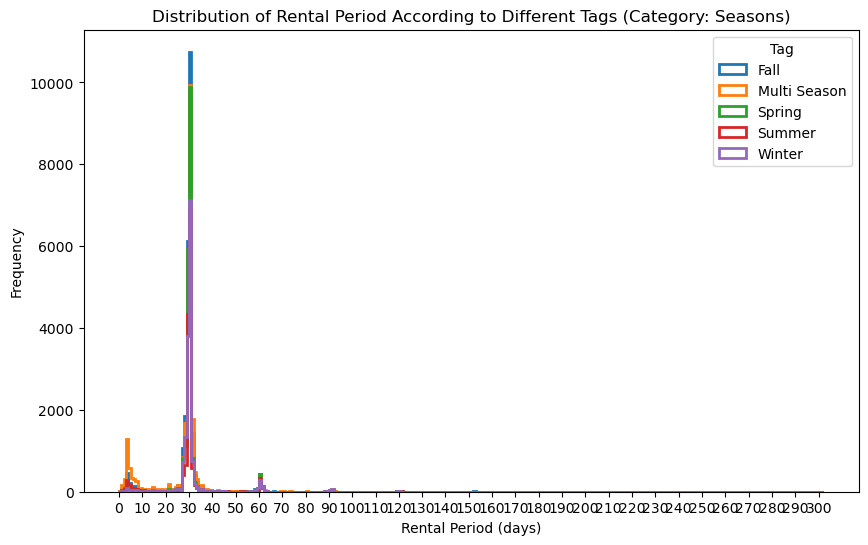

In [ ]:
# Filter the dataframe where category is 'Seasons'
filtered_df = merged_df[merged_df['category'] == 'Seasons']

# Convert rentalPeriod to days if it's not already in days
filtered_df['rentalPeriod'] = filtered_df['rentalPeriod'].apply(lambda x: x.days if hasattr(x, 'days') else x)

# Plot the distribution of rentalPeriod according to the different tags using histogram with lines only and bins in days
plt.figure(figsize=(10, 6))
for tag, group in filtered_df.groupby('tag'):
    group['rentalPeriod'].plot(kind='hist', histtype='step', linewidth=2, bins=range(0, max(filtered_df['rentalPeriod']) + 1), label=tag)

plt.xlabel('Rental Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Period According to Different Tags (Category: Seasons)')
plt.legend(title='Tag')
# Set x-ticks every 10 days
max_days = max(filtered_df['rentalPeriod'])
plt.xticks(range(0, max_days + 1, 10))
plt.show()


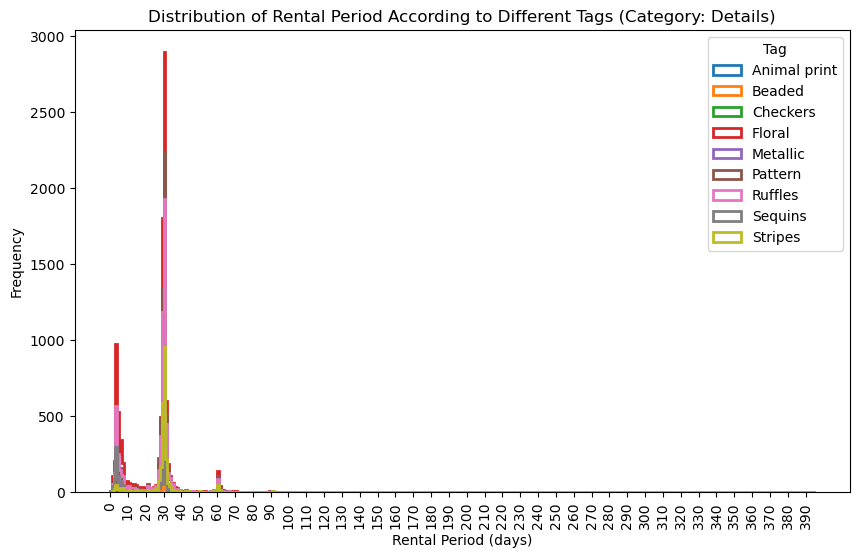

In [ ]:
# Filter the dataframe where category is 'Details'
filtered_df = merged_df[merged_df['category'] == 'Details']

# Convert rentalPeriod to days if it's not already in days
filtered_df['rentalPeriod'] = filtered_df['rentalPeriod'].apply(lambda x: x.days if hasattr(x, 'days') else x)

# Plot the distribution of rentalPeriod according to the different tags using histogram with lines only and bins in days
plt.figure(figsize=(10, 6))
for tag, group in filtered_df.groupby('tag'):
    group['rentalPeriod'].plot(kind='hist', histtype='step', linewidth=2, bins=range(0, max(filtered_df['rentalPeriod']) + 1), label=tag)

plt.xlabel('Rental Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Period According to Different Tags (Category: Details)')
plt.legend(title='Tag')
# Set x-ticks every 10 days
max_days = max(filtered_df['rentalPeriod'])
plt.xticks(range(0, max_days + 1, 10),rotation=90)
plt.show()


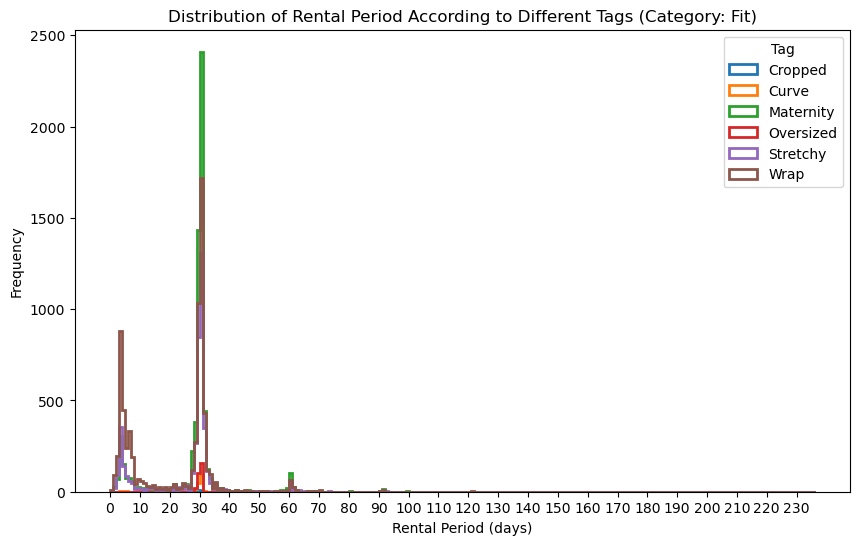

In [ ]:
# Filter the dataframe where category is 'Fit'
filtered_df = merged_df[merged_df['category'] == 'Fit']

# Convert rentalPeriod to days if it's not already in days
filtered_df['rentalPeriod'] = filtered_df['rentalPeriod'].apply(lambda x: x.days if hasattr(x, 'days') else x)

# Plot the distribution of rentalPeriod according to the different tags using histogram with lines only and bins in days
plt.figure(figsize=(10, 6))
for tag, group in filtered_df.groupby('tag'):
    group['rentalPeriod'].plot(kind='hist', histtype='step', linewidth=2, bins=range(0, max(filtered_df['rentalPeriod']) + 1), label=tag)

plt.xlabel('Rental Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Period According to Different Tags (Category: Fit)')
plt.legend(title='Tag')
# Set x-ticks every 10 days
max_days = max(filtered_df['rentalPeriod'])
plt.xticks(range(0, max_days + 1, 10))
plt.show()


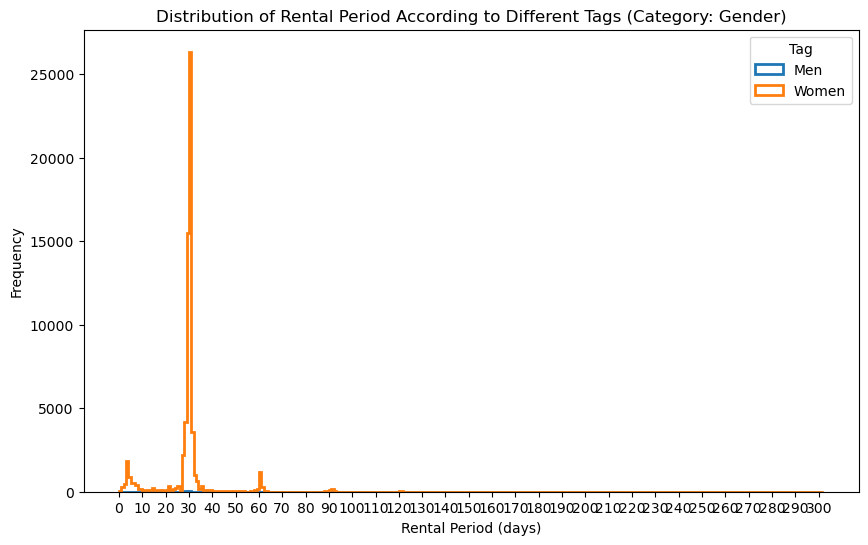

In [ ]:
# Filter the dataframe where category is 'Gender'
filtered_df = merged_df[merged_df['category'] == 'Gender']

# Convert rentalPeriod to days if it's not already in days
filtered_df['rentalPeriod'] = filtered_df['rentalPeriod'].apply(lambda x: x.days if hasattr(x, 'days') else x)

# Plot the distribution of rentalPeriod according to the different tags using histogram with lines only and bins in days
plt.figure(figsize=(10, 6))
for tag, group in filtered_df.groupby('tag'):
    group['rentalPeriod'].plot(kind='hist', histtype='step', linewidth=2, bins=range(0, max(filtered_df['rentalPeriod']) + 1), label=tag)

plt.xlabel('Rental Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Period According to Different Tags (Category: Gender)')
plt.legend(title='Tag')
# Set x-ticks every 10 days
max_days = max(filtered_df['rentalPeriod'])
plt.xticks(range(0, max_days + 1, 10))
plt.show()


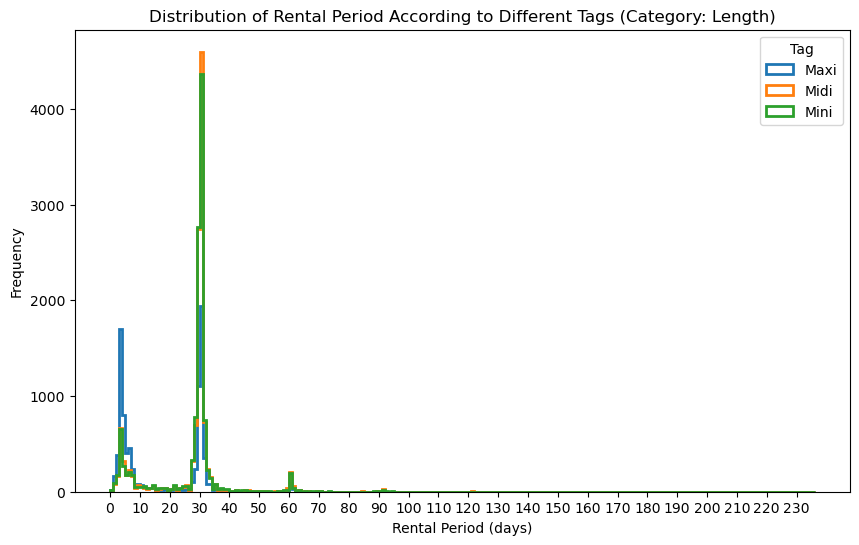

In [ ]:
# Filter the dataframe where category is 'Length'
filtered_df = merged_df[merged_df['category'] == 'Length']

# Convert rentalPeriod to days if it's not already in days
filtered_df['rentalPeriod'] = filtered_df['rentalPeriod'].apply(lambda x: x.days if hasattr(x, 'days') else x)

# Plot the distribution of rentalPeriod according to the different tags using histogram with lines only and bins in days
plt.figure(figsize=(10, 6))
for tag, group in filtered_df.groupby('tag'):
    group['rentalPeriod'].plot(kind='hist', histtype='step', linewidth=2, bins=range(0, max(filtered_df['rentalPeriod']) + 1), label=tag)

plt.xlabel('Rental Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Period According to Different Tags (Category: Length)')
plt.legend(title='Tag')
# Set x-ticks every 10 days
max_days = max(filtered_df['rentalPeriod'])
plt.xticks(range(0, max_days + 1, 10))
plt.show()


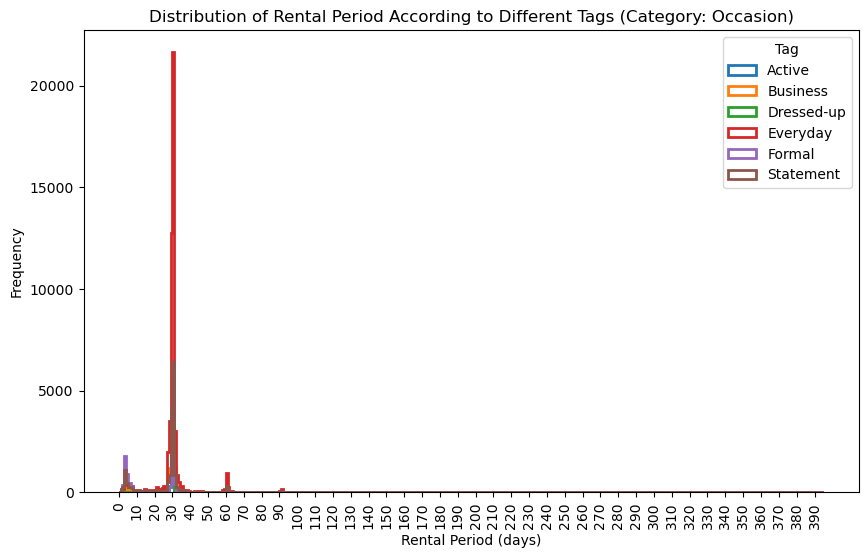

In [ ]:
# Filter the dataframe where category is 'Occasion'
filtered_df = merged_df[merged_df['category'] == 'Occasion']

# Convert rentalPeriod to days if it's not already in days
filtered_df['rentalPeriod'] = filtered_df['rentalPeriod'].apply(lambda x: x.days if hasattr(x, 'days') else x)

# Plot the distribution of rentalPeriod according to the different tags using histogram with lines only and bins in days
plt.figure(figsize=(10, 6))
for tag, group in filtered_df.groupby('tag'):
    group['rentalPeriod'].plot(kind='hist', histtype='step', linewidth=2, bins=range(0, max(filtered_df['rentalPeriod']) + 1), label=tag)

plt.xlabel('Rental Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Period According to Different Tags (Category: Occasion)')
plt.legend(title='Tag')
# Set x-ticks every 10 days
max_days = max(filtered_df['rentalPeriod'])
plt.xticks(range(0, max_days + 1, 10),rotation=90)
plt.show()


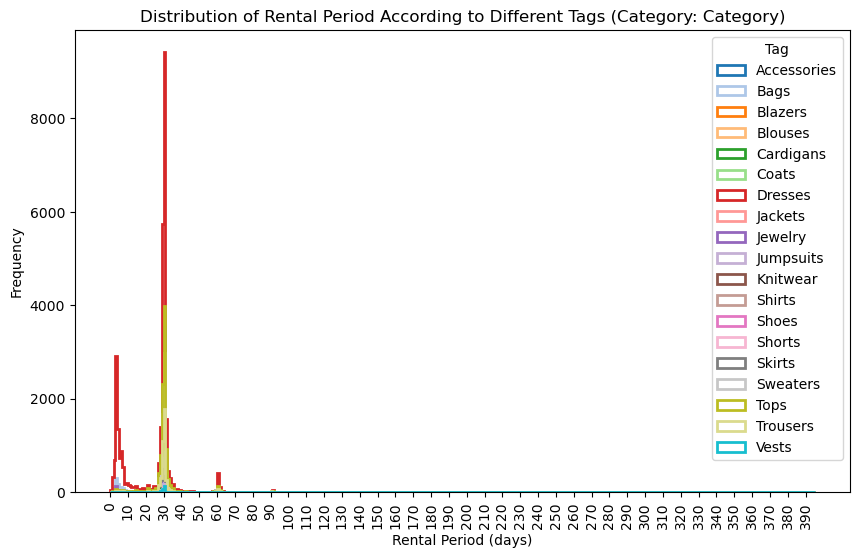

In [ ]:
# Filter the dataframe where category is 'Category'
filtered_df = merged_df[merged_df['category'] == 'Category']

# Convert rentalPeriod to days if it's not already in days
filtered_df['rentalPeriod'] = filtered_df['rentalPeriod'].apply(lambda x: x.days if hasattr(x, 'days') else x)

# Plot the distribution of rentalPeriod according to the different tags using histogram with lines only, bins in days, and the palette tab20
plt.figure(figsize=(10, 6))
colors = plt.get_cmap('tab20').colors
for i, (tag, group) in enumerate(filtered_df.groupby('tag')):
    group['rentalPeriod'].plot(kind='hist', histtype='step', linewidth=2, bins=range(0, max(filtered_df['rentalPeriod']) + 1), label=tag, color=colors[i % len(colors)])

plt.xlabel('Rental Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Period According to Different Tags (Category: Category)')
plt.legend(title='Tag')
# Set x-ticks every 10 days
max_days = max(filtered_df['rentalPeriod'])
plt.xticks(range(0, max_days + 1, 10),rotation=90)
plt.show()


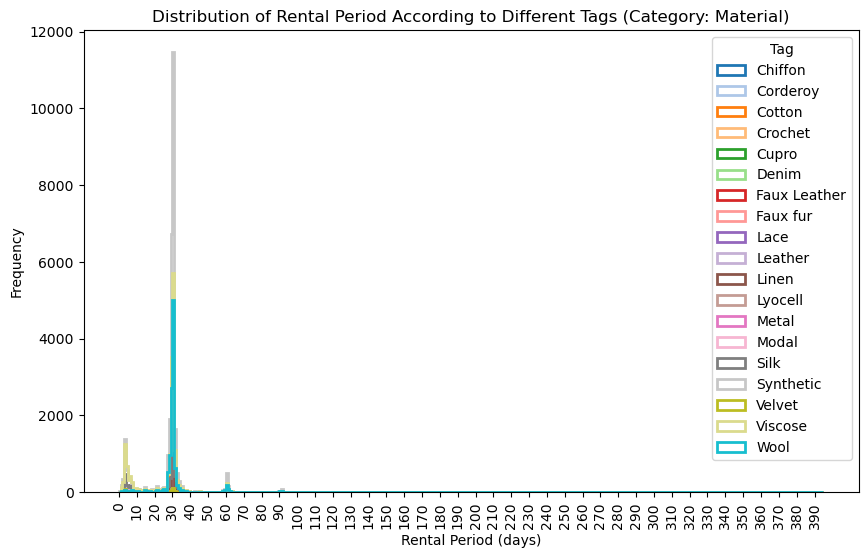

In [ ]:
# Filter the dataframe where category is 'Material'
filtered_df = merged_df[merged_df['category'] == 'Material']

# Convert rentalPeriod to days if it's not already in days
filtered_df['rentalPeriod'] = filtered_df['rentalPeriod'].apply(lambda x: x.days if hasattr(x, 'days') else x)

# Plot the distribution of rentalPeriod according to the different tags using histogram with lines only, bins in days, and the palette tab20
plt.figure(figsize=(10, 6))
colors = plt.get_cmap('tab20').colors
for i, (tag, group) in enumerate(filtered_df.groupby('tag')):
    group['rentalPeriod'].plot(kind='hist', histtype='step', linewidth=2, bins=range(0, max(filtered_df['rentalPeriod']) + 1), label=tag, color=colors[i % len(colors)])

plt.xlabel('Rental Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Period According to Different Tags (Category: Material)')
plt.legend(title='Tag')
# Set x-ticks every 10 days
max_days = max(filtered_df['rentalPeriod'])
plt.xticks(range(0, max_days + 1, 10),rotation=90)
plt.show()


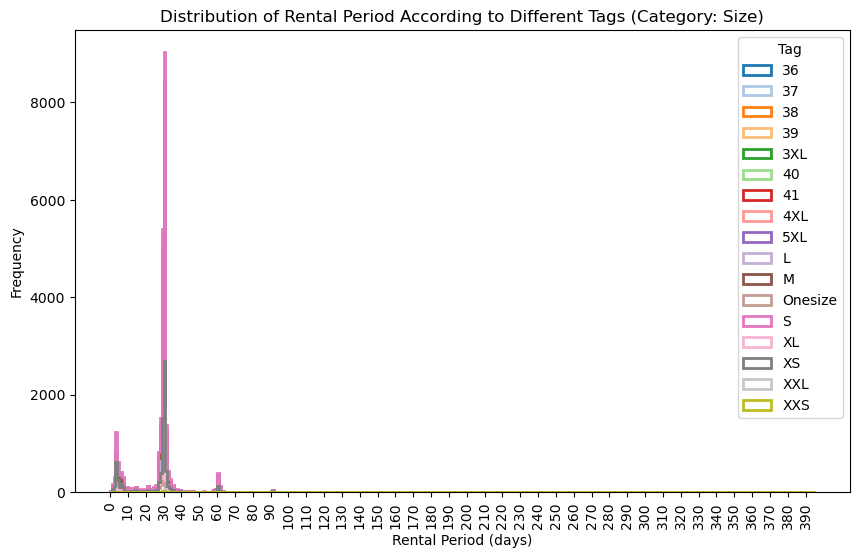

In [ ]:
# Filter the dataframe where category is 'Size'
filtered_df = merged_df[merged_df['category'] == 'Size']

# Convert rentalPeriod to days if it's not already in days
filtered_df['rentalPeriod'] = filtered_df['rentalPeriod'].apply(lambda x: x.days if hasattr(x, 'days') else x)

# Plot the distribution of rentalPeriod according to the different tags using histogram with lines only, bins in days, and the palette tab20
plt.figure(figsize=(10, 6))
colors = plt.get_cmap('tab20').colors
for i, (tag, group) in enumerate(filtered_df.groupby('tag')):
    group['rentalPeriod'].plot(kind='hist', histtype='step', linewidth=2, bins=range(0, max(filtered_df['rentalPeriod']) + 1), label=tag, color=colors[i % len(colors)])

plt.xlabel('Rental Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Period According to Different Tags (Category: Size)')
plt.legend(title='Tag')
# Set x-ticks every 10 days
max_days = max(filtered_df['rentalPeriod'])
plt.xticks(range(0, max_days + 1, 10),rotation=90)
plt.show()


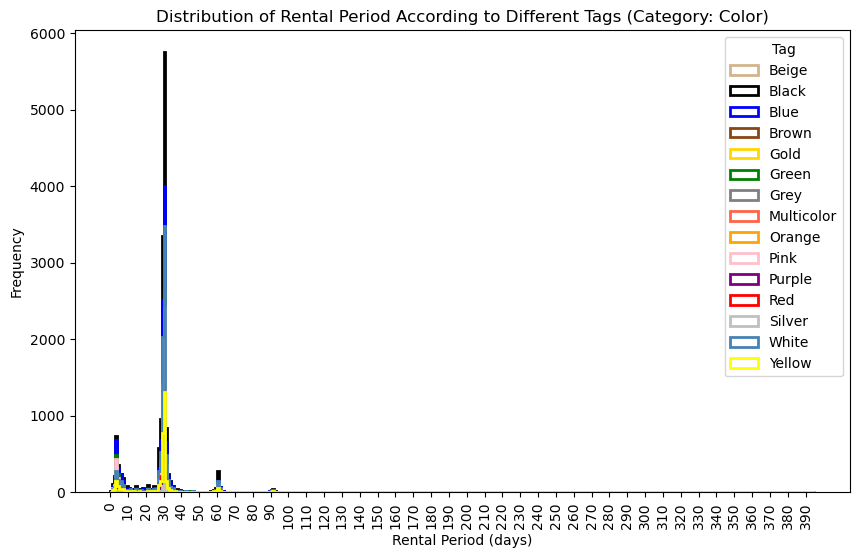

In [ ]:
# Filter the dataframe where category is 'Color'
filtered_df = merged_df[merged_df['category'] == 'Color']

# Convert rentalPeriod to days if it's not already in days
filtered_df['rentalPeriod'] = filtered_df['rentalPeriod'].apply(lambda x: x.days if hasattr(x, 'days') else x)

# Plot the distribution of rentalPeriod according to the different tags using histogram with lines only, bins in days, and the palette tab20
plt.figure(figsize=(10, 6))
colors = ['#D2B48C', '#000000', '#0000FF', '#8B4513', '#FFD700', '#008000', '#808080', '#FF6347', '#FFA500', '#FFC0CB', '#800080', '#FF0000', '#C0C0C0', '#4682B4', '#FFFF00']
for i, (tag, group) in enumerate(filtered_df.groupby('tag')):
    group['rentalPeriod'].plot(kind='hist', histtype='step', linewidth=2, bins=range(0, max(filtered_df['rentalPeriod']) + 1), label=tag, color=colors[i % len(colors)])

plt.xlabel('Rental Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Period According to Different Tags (Category: Color)')
plt.legend(title='Tag')
# Set x-ticks every 10 days
max_days = max(filtered_df['rentalPeriod'])
plt.xticks(range(0, max_days + 1, 10),rotation=90)
plt.show()


For all tags across all categories, the rental period is primarily one month, and if not, it is typically one week.